In [203]:
import pandas as pd

In [204]:
df = pd.read_csv("/Users/parteek/Desktop/ml-classification/Classification-ml/in-vehicle-coupon-recommendation.csv")

In [205]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [206]:
df.shape

(12684, 26)

In [207]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [208]:
# as car column has 12,576 missing values out of 12,684 total rows which is >99% so it is better to drop this column .
df.drop(columns = 'car', inplace=True)

In [209]:
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [210]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

In [211]:
# checking number of duplicated rows present
df.duplicated().sum()

74

In [212]:
# Removing all duplicate rows (keeping the first occurrence)
df.drop_duplicates(inplace=True)

In [213]:
df.reset_index(drop=True, inplace=True)

In [214]:
df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [215]:
df['Bar'].value_counts()

Bar
never    5178
less1    3438
1~3      2468
4~8      1071
gt8       348
Name: count, dtype: int64

In [216]:
# Replacing missing values with the most common value (mode)
mode_value = df['Bar'].mode()[0]
df['Bar'] = df['Bar'].fillna(mode_value)

In [217]:
mode_value = df['CoffeeHouse'].mode()[0]
df['CoffeeHouse'] = df['CoffeeHouse'].fillna(mode_value)

In [218]:
mode_value = df['CarryAway'].mode()[0]
df['CarryAway'] = df['CarryAway'].fillna(mode_value)

In [219]:
mode_value = df['RestaurantLessThan20'].mode()[0]
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].fillna(mode_value)

In [220]:
mode_value = df['Restaurant20To50'].mode()[0]
df['Restaurant20To50'] = df['Restaurant20To50'].fillna(mode_value)

In [221]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [222]:
# now data is cleaned here ..
# here for the missing values less than 95% (for the entire column ) i have used made imputation.
# if a specific column had more than 95% missing values then i have considered droping the whole column .
# also i have removed all duplicated rows.

In [223]:
df.shape

(12610, 25)

In [224]:
df.to_csv('cleaned_data.csv', index=False)

In [225]:
cols = df.select_dtypes(include=['number'])
cols

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,55,1,1,0,0,0,1,1
1,80,1,1,0,0,0,1,0
2,80,1,1,1,0,0,1,1
3,80,1,1,1,0,0,1,0
4,80,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
12605,55,0,1,0,0,1,0,1
12606,55,0,1,0,0,0,1,1
12607,30,0,1,0,0,1,0,0
12608,30,0,1,1,1,0,1,0


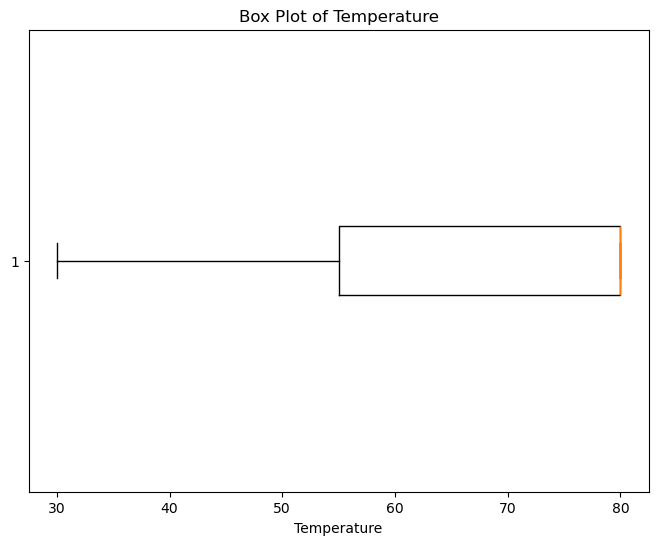

In [226]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(df['temperature'], vert=False)
plt.title('Box Plot of Temperature')
plt.xlabel('Temperature')
plt.show()

In [227]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

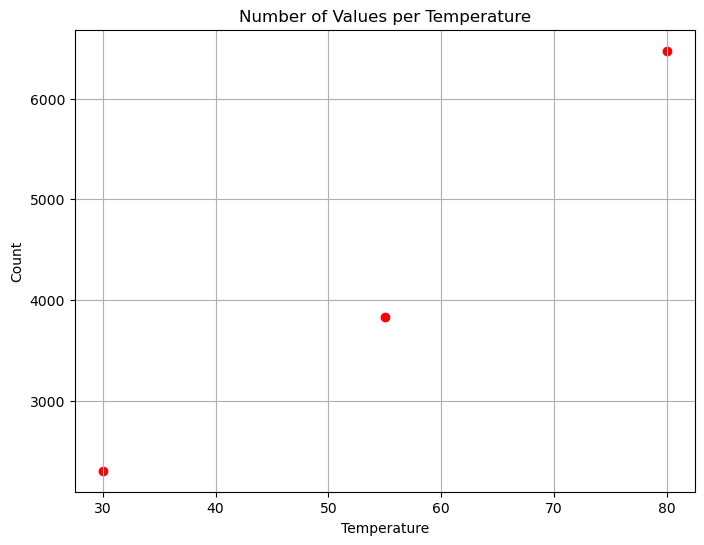

In [228]:
temp_counts = df['temperature'].value_counts().sort_index()  

plt.figure(figsize=(8, 6))
plt.scatter(temp_counts.index, temp_counts.values, color='red')
plt.title('Number of Values per Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [229]:
# the data (numeric values ) have very less unique values so it might not be the best way to cap or remove them 
# so here i am going to convert these to categorical values which makes more sense as they are squeued 30-55-80
# so we can transform these as low , medium and high values

In [230]:
df.temperature.unique()

array([55, 80, 30])

In [231]:
mapping = {30: 'low', 55: 'medium', 80: 'high'}

df['temperature'] = df['temperature'].map(mapping)

In [232]:
df.to_csv("no_outliers_data.csv",index=False)

In [274]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [280]:
# here column toCoupon_GEQ5min has only one unique value so , dropping that .
df.drop('toCoupon_GEQ5min', axis=1, inplace=True)

In [282]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
corr_matrix

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
has_children,1.000000,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ15min,0.079434,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.010773,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,-0.032353,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,0.032353,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,-0.045056,-0.082693,-0.108139,0.014932,-0.014932,1.000000


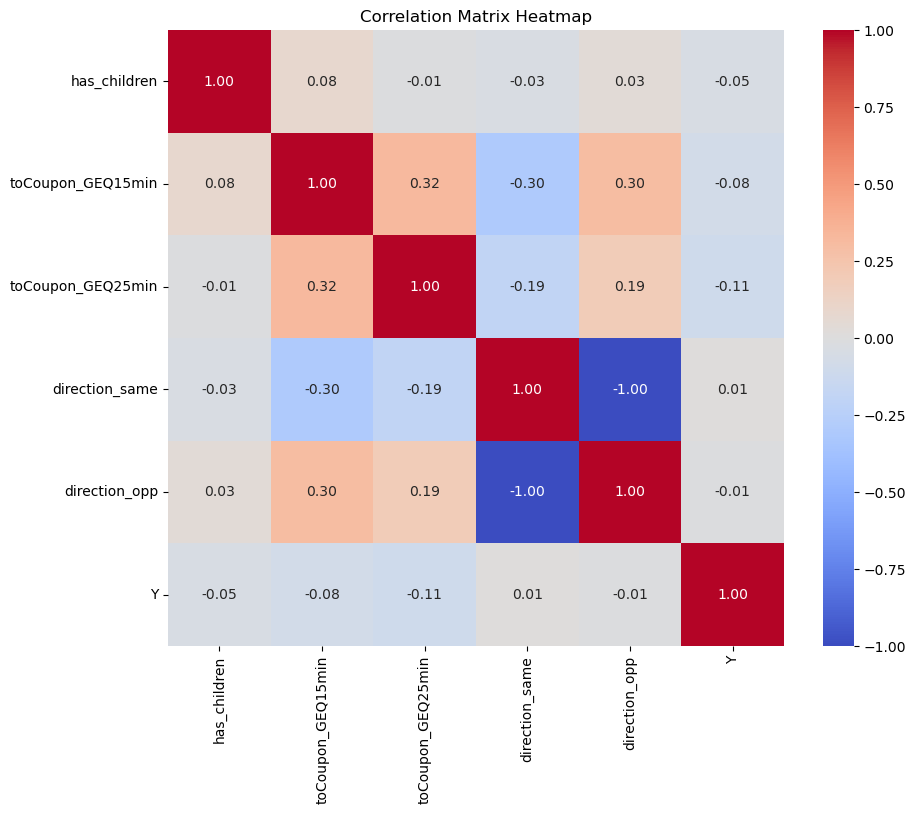

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True,fmt='.2f',cmap='coolwarm', square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()
# why nan values


In [286]:
# we can see that direction_same and direction_opp is just opposite of each other as they have a score of -1 so 
# we can drop one of them .

In [288]:
df.drop('direction_opp', axis=1, inplace=True)

In [292]:
df.to_csv("after_corr_matrix.csv",index=False)